## Cluster Analysis
### Business Objective:
Creating clusters on global development measurement dataset

Data Set Details:
The dataset has information about important economic and development metrics related to various countries across the globe.
## Variable Description:
Birth Rate, Business tax, CO2emissions, Country, Days to start business, Ease of business, energy usage, GDP, healthexp%GDP, healthexp/capita, hours to do tax, infant mortality, internet usage, lending rate, life expectancy female, etc.
## Acceptance Criterion: 
Work on different clustering models, do a comparative analysis and need to deploy the clustering application on streamlit, flask etc.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df=pd.read_excel(r"C:\Users\aravi\OneDrive\Desktop\Project Files\World_development_mesurement.xlsx")

# Exploratory Data Analysis

In [3]:
df.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Country,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,...,Life_Expectancy_Male,Mobile_Phone_Usage,Number_of_Records,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
df.shape

(2704, 25)

In [5]:
df.columns

Index(['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions', 'Country',
       'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
       'Health_Exp%GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
       'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
       'Number_of_Records', 'Population_0to14', 'Population_15to64',
       'Population_65plus', 'Population_Total', 'Population_Urban',
       'Tourism_Inbound', 'Tourism_Outbound'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2585 non-null   float64
 1   Business_Tax_Rate       1423 non-null   object 
 2   CO2_Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days_to_Start_Business  1718 non-null   float64
 5   Ease_of_Business        185 non-null    float64
 6   Energy_Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health_Exp%GDP          2395 non-null   float64
 9   Health_Exp/Capita       2395 non-null   object 
 10  Hours_to_do_Tax         1416 non-null   float64
 11  Infant_Mortality_Rate   2444 non-null   float64
 12  Internet_Usage          2531 non-null   float64
 13  Lending_Interest        1880 non-null   float64
 14  Life_Expectancy_Female  2568 non-null   

In [7]:
df.isnull().sum()

Birth_Rate                 119
Business_Tax_Rate         1281
CO2_Emissions              579
Country                      0
Days_to_Start_Business     986
Ease_of_Business          2519
Energy_Usage               919
GDP                        210
Health_Exp%GDP             309
Health_Exp/Capita          309
Hours_to_do_Tax           1288
Infant_Mortality_Rate      260
Internet_Usage             173
Lending_Interest           824
Life_Expectancy_Female     136
Life_Expectancy_Male       136
Mobile_Phone_Usage         167
Number_of_Records            0
Population_0to14           220
Population_15to64          220
Population_65plus          220
Population_Total             0
Population_Urban            26
Tourism_Inbound            368
Tourism_Outbound           471
dtype: int64

In [8]:
# Check for duplicates
duplicates = df.duplicated()

# Count number of duplicates
num_duplicates = duplicates.sum()

print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


In [9]:
df.describe()

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,Health_Exp%GDP,Hours_to_do_Tax,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Number_of_Records,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


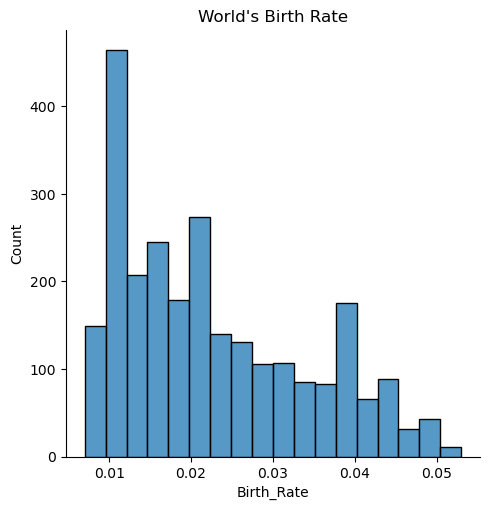

In [10]:
# Lets explore birth rate
sns.displot(df['Birth_Rate'])
plt.title("World's Birth Rate")
plt.show()

### Key Insights from the above plot:
1. The Birth_Rate data is asymmetrical
2. It is right skewed distribution
3. The Global Most frequent Birth Rate is 0.01

In [11]:
df['Country'].nunique()

208

In [12]:
# Removing percentage symbol from the Birth Rate column
df['Business_Tax_Rate'] = df['Business_Tax_Rate'].str.replace('%', '')

# Convert the Birth Rate column to a float data type
df['Business_Tax_Rate'] = df['Business_Tax_Rate'].astype(float)



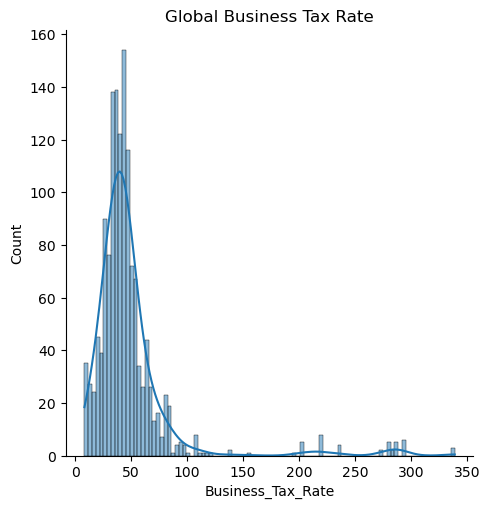

In [13]:
# Representation of Global business Tax Rate by using distplot
sns.displot(x='Business_Tax_Rate', data=df, kde=True)
plt.title('Global Business Tax Rate')
plt.show()

### Key insights from the Data:
1. The Business Tax Rate data is a letpo kurtic distribution and Positive skewed
2. The Global Business Tax Rate is highly occuring in between 20-55%
3. Few countries having Business Tax Rate as more than 100%

In [14]:
df['CO2_Emissions']

0       87931.0
1        9542.0
2        1617.0
3        4276.0
4        1041.0
         ...   
2699        NaN
2700        NaN
2701        NaN
2702        NaN
2703        NaN
Name: CO2_Emissions, Length: 2704, dtype: float64

In [15]:
df['CO2_Emissions']=df['CO2_Emissions'].astype(float)

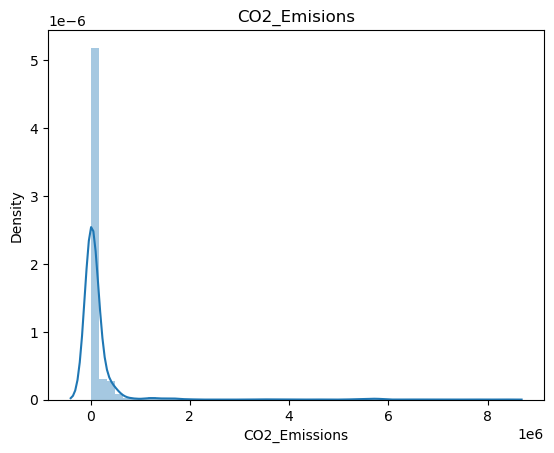

In [16]:
sns.distplot(df['CO2_Emissions'])
plt.title('CO2_Emisions')
plt.show()

In [17]:
print('The total Countries are: ', df['Country'].nunique(),'\n')
print('The country Names are as follows:', "\n\n", df['Country'].unique())

The total Countries are:  208 

The country Names are as follows: 

 ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan'
 'Armenia' 'Azerbaijan' 'Bangladesh' 'Bhutan' 'Brunei Darussalam'
 'Cambodia' 'China' 'Georgia' 'Hong Kong SAR, China' 'India' 'Indonesia'
 'Japan' 'Kazakhstan' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kyrgyz Republic'
 'Lao PDR' 'Macao SAR, China' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 '

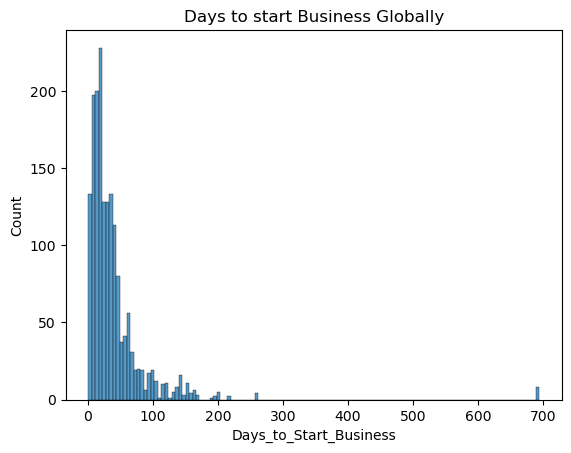

In [18]:
# Plotting the number of Days to start business globally
sns.histplot(df['Days_to_Start_Business'])
plt.title('Days to start Business Globally')
plt.show()

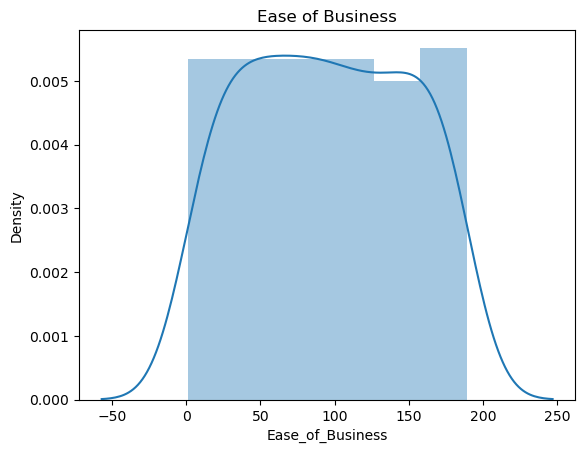

In [19]:
sns.distplot(df['Ease_of_Business'])
plt.title('Ease of Business')
plt.show()

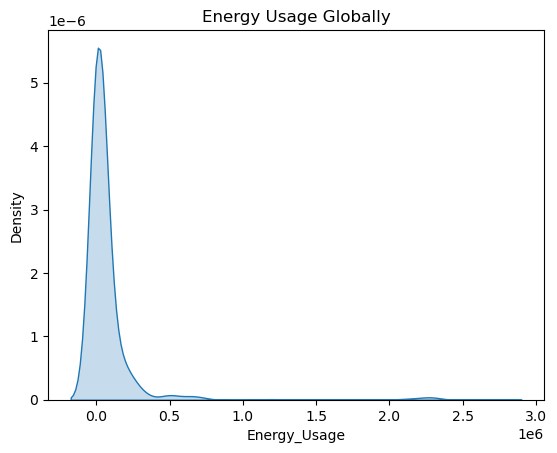

In [20]:
# Plotting Energy Usage Data
sns.kdeplot(df['Energy_Usage'],shade=True)
plt.title('Energy Usage Globally')
plt.show()

In [21]:
# Removing percentage symbol from the Birth Rate column
df['GDP'] = df['GDP'].str.replace('$', '')
df['GDP'] = df['GDP'].str.replace(',', '')


# Convert the Birth Rate column to a float data type
df['GDP'] = df['GDP'].astype(float)
print( df['GDP'].min() )
print( df['GDP'].max() )

63101272.0
16244600000000.0


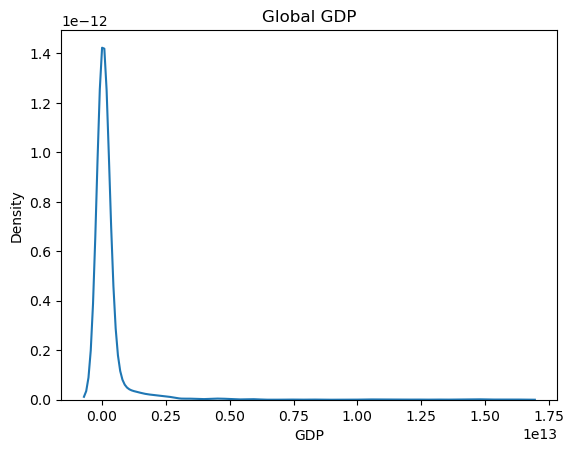

In [22]:
sns.kdeplot(df['GDP'])
plt.title('Global GDP')
plt.show()

mean 0.06416951983298544
median 0.061 

mode 0    0.056
1    0.063
Name: Health_Exp%GDP, dtype: float64


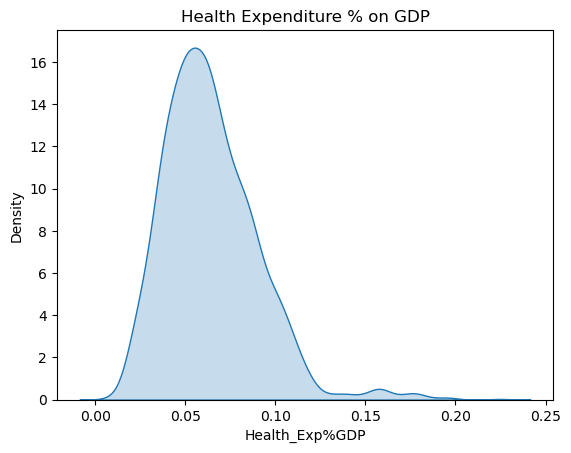

In [23]:
# plotting Health Expenditure % on GDP
print('mean',df['Health_Exp%GDP'].mean())
print('median',df['Health_Exp%GDP'].median(),'\n')

print('mode',df['Health_Exp%GDP'].mode())


sns.kdeplot(x='Health_Exp%GDP', data=df, shade=True)
plt.title('Health Expenditure % on GDP')
plt.show()

### Key Insights from the above KDEplot:
1. The Health expenditure on the GDP is slightly right skewed
2. Almost 95% of the countries health expenditure is falling in between 0.02 to 0.10 % of their GDP

In [24]:
# Removing $ symbol & converting to float type
df['Health_Exp/Capita']=df['Health_Exp/Capita'].str.replace('$', '')
df['Health_Exp/Capita']=df['Health_Exp/Capita'].str.replace(',', '')

df['Health_Exp/Capita']=df['Health_Exp/Capita'].astype(float)


count    2395.000000
mean      801.397077
std      1473.448036
min         2.000000
25%        50.000000
50%       193.000000
75%       665.000000
max      9908.000000
Name: Health_Exp/Capita, dtype: float64


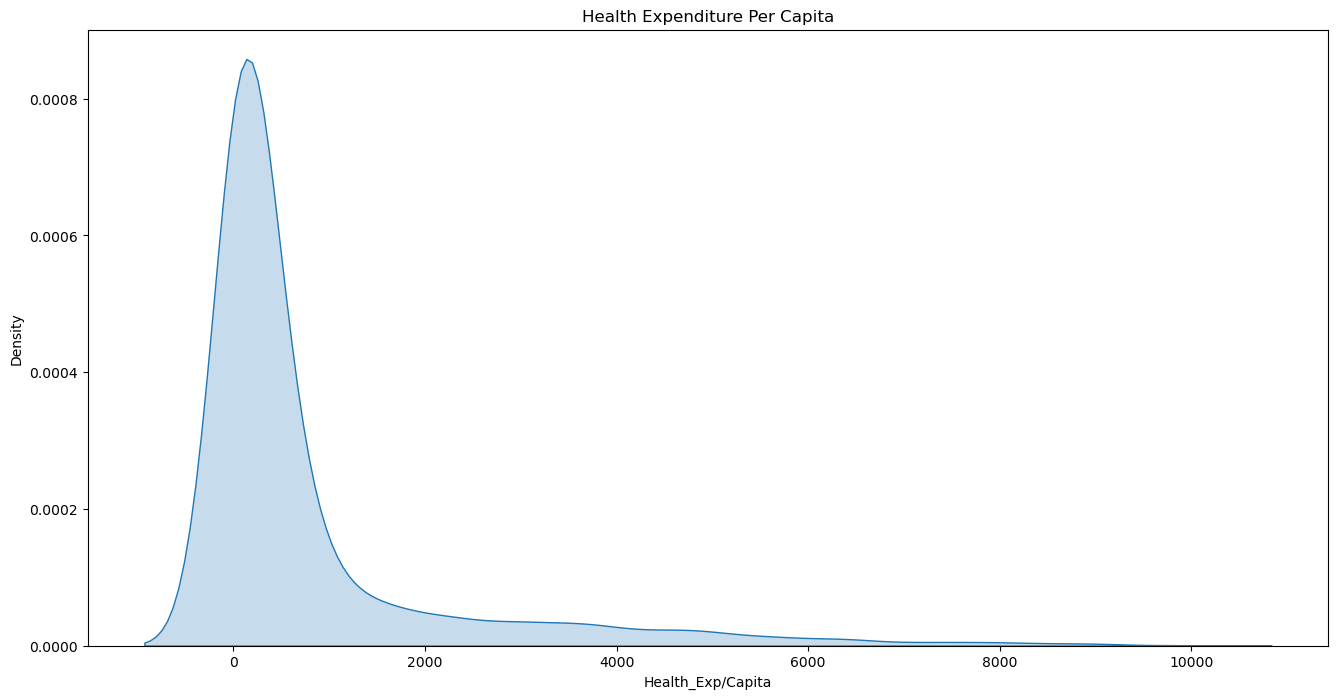

In [25]:
# Health Exp/Capita
print(df['Health_Exp/Capita'].describe())
plt.figure(figsize=(16,8))
sns.kdeplot(x='Health_Exp/Capita', data=df, shade=True)
plt.title('Health Expenditure Per Capita')
plt.show()


### Key Observations:
1. The Health Expenditure per capita data is right skewed distribution
2. The most of the countries Health expenditure per capita is falling below 2000

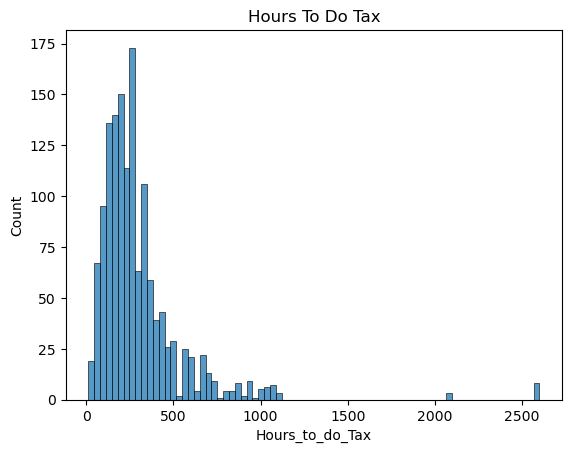

In [26]:
sns.histplot(df['Hours_to_do_Tax'])
plt.title('Hours To Do Tax')
plt.show()

count    2444.000000
mean        0.032813
std         0.029968
min         0.002000
25%         0.009000
50%         0.020000
75%         0.053000
max         0.141000
Name: Infant_Mortality_Rate, dtype: float64


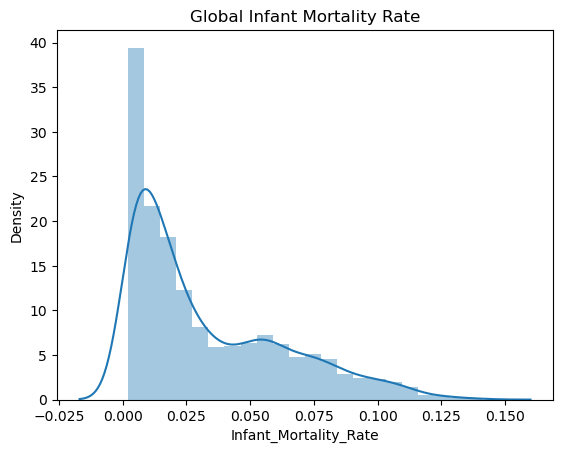

In [27]:
# Plotting Infant Mortality Rate
print(df['Infant_Mortality_Rate'].describe())
sns.distplot(df['Infant_Mortality_Rate'])
plt.title('Global Infant Mortality Rate')
plt.show()

###  Key Observations:
1. Global Infant Mortality Rate is right skewed distribution
2. Global Maximum Infant mortality rate is 0.141 %

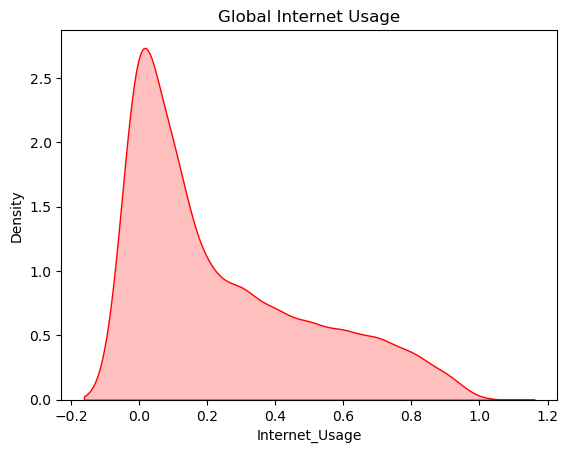

In [28]:
# Global Internet usage
sns.kdeplot(df['Internet_Usage'], shade=True, color='red')
plt.title('Global Internet Usage')
plt.show()

### Key Observations:
1. Globally Internet Usage data is right skewed distribution
2. We can see that the peakedness of the curve is at 0, hence globally the internet users are very low

count    1880.000000
mean        0.148103
std         0.171829
min         0.005000
25%         0.080000
50%         0.120000
75%         0.173000
max         4.965000
Name: Lending_Interest, dtype: float64


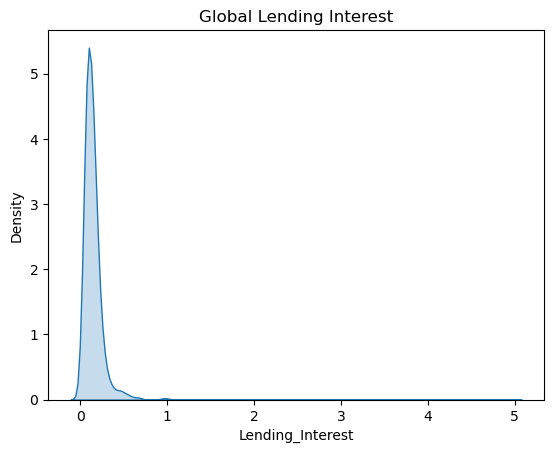

In [29]:
# Plotting Lending Interest 
print(df['Lending_Interest'].describe())
sns.kdeplot(df['Lending_Interest'], shade=True)
plt.title('Global Lending Interest')
plt.show()

### Key Observations:
1. Global Lending Interest rate data is right skewed distribution
2. Global lending interest mostly falling below 0.5%, and the highest lending interest rate is 4.96

count    2568.000000
mean       71.159268
std        10.708262
min        39.000000
25%        64.000000
50%        75.000000
75%        79.000000
max        87.000000
Name: Life_Expectancy_Female, dtype: float64


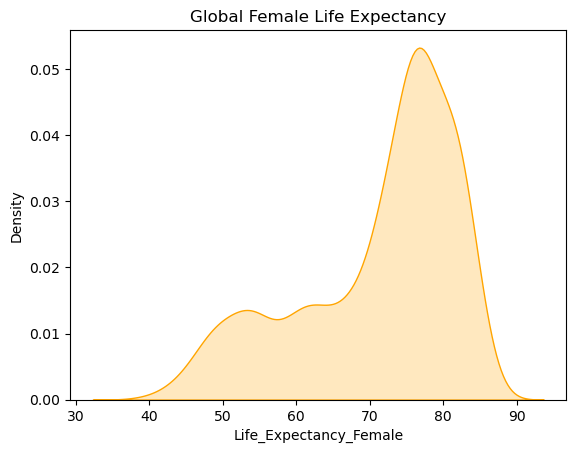

In [30]:
# plotting Life Expectancy Female
print(df['Life_Expectancy_Female'].describe())
sns.kdeplot(df['Life_Expectancy_Female'], shade=True, color='orange')
plt.title('Global Female Life Expectancy')
plt.show()

### Key Observations:
1. Global Female life expectancy data is negatively skewed distribution
2. The maximum female life expectancy is 87 years, mean life expectancy is 71 years, minimum life expectancy is 39 years

count    2568.000000
mean       66.461838
std         9.390217
min        37.000000
25%        61.000000
50%        69.000000
75%        73.250000
max        88.000000
Name: Life_Expectancy_Male, dtype: float64


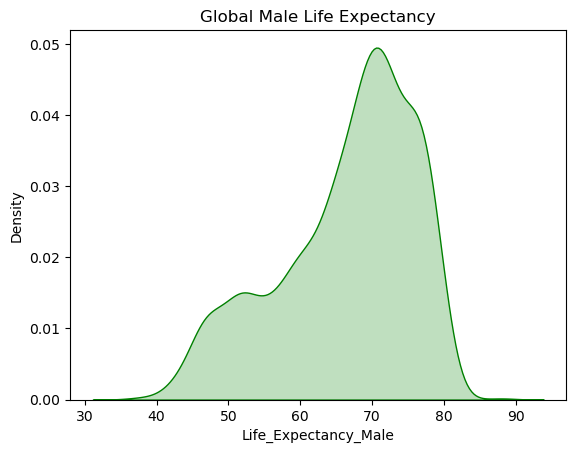

In [31]:
# plotting Life Expectancy Female
print(df['Life_Expectancy_Male'].describe())
sns.kdeplot(df['Life_Expectancy_Male'], shade=True, color='Green')
plt.title('Global Male Life Expectancy')
plt.show()

### Key Observations:
1. Global Female life expectancy data is negatively skewed distribution
2. The maximum female life expectancy is 88 years, mean life expectancy is 66 years, minimum life expectancy is 37 years

count    2537.000000
mean        0.578124
std         0.474647
min         0.000000
25%         0.100000
50%         0.500000
75%         0.900000
max         2.900000
Name: Mobile_Phone_Usage, dtype: float64


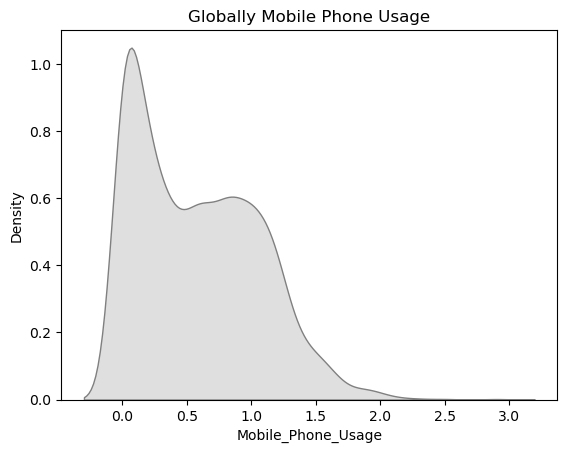

In [32]:
# Plotting Gobal mobile phone usage 
print(df['Mobile_Phone_Usage'].describe())
#sns.kdeplot(x='Mobile_Phone_Usage', hue='Country', data=df)
sns.kdeplot(df['Mobile_Phone_Usage'], shade=True, color='Grey')
plt.title('Globally Mobile Phone Usage')
plt.show()

count    2704.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Number_of_Records, dtype: float64


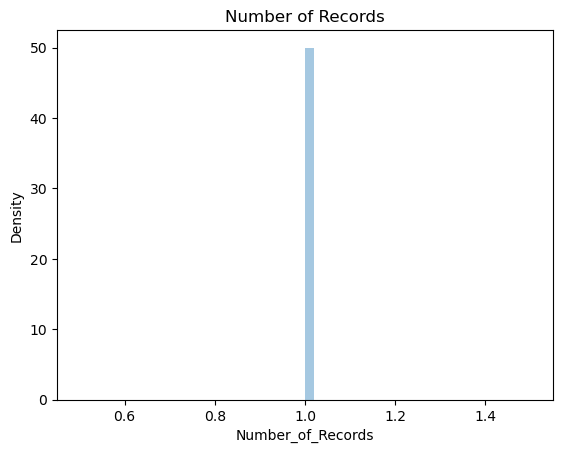

In [33]:
# Plotting Number of Records
print(df['Number_of_Records'].describe())
sns.distplot(df['Number_of_Records'])
plt.title('Number of Records')
plt.show()

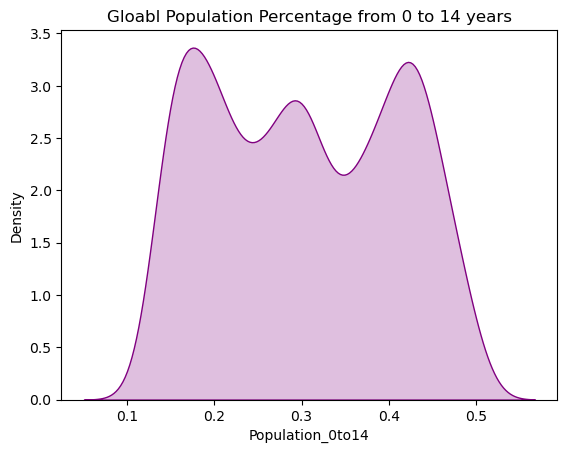

In [34]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population_0to14'], shade=True, color='purple')
plt.title('Gloabl Population Percentage from 0 to 14 years')
plt.show()

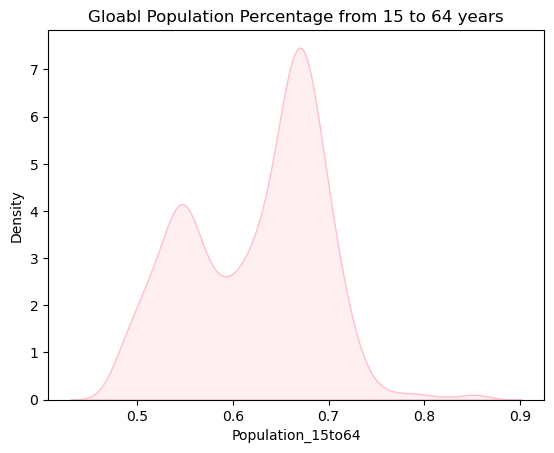

In [35]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population_15to64'], shade=True, color='pink')
plt.title('Gloabl Population Percentage from 15 to 64 years')
plt.show()

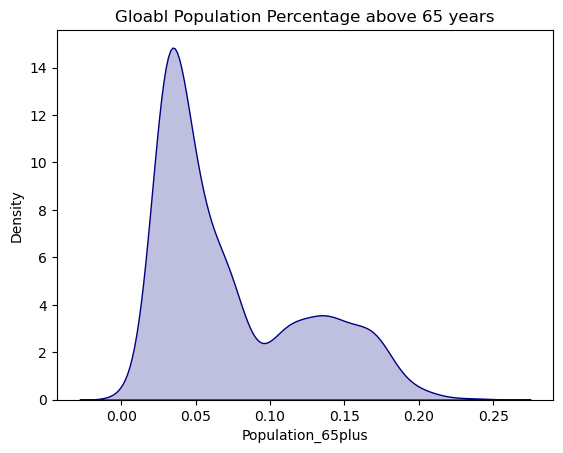

In [36]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population_65plus'], shade=True, color='navy')
plt.title('Gloabl Population Percentage above 65 years')
plt.show()

count    2.704000e+03
mean     3.145729e+07
std      1.242894e+08
min      1.887600e+04
25%      8.783360e+05
50%      5.800324e+06
75%      2.014089e+07
max      1.350695e+09
Name: Population_Total, dtype: float64


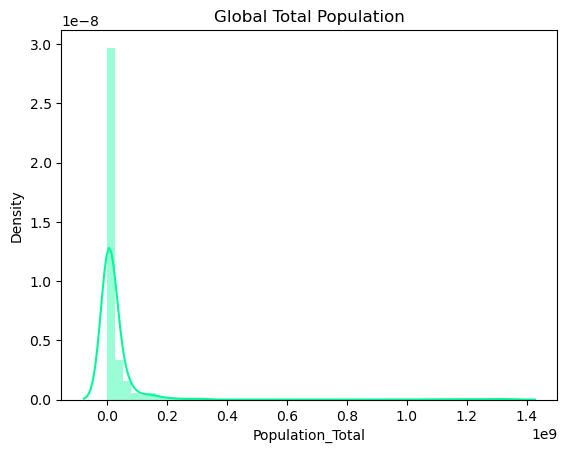

In [37]:
# Global Total Population Representation
print(df['Population_Total'].describe())
sns.distplot(df['Population_Total'],color='mediumspringgreen')
plt.title('Global Total Population')
plt.show()

### Key Observations:
1. The Total population is positively skewed distribution

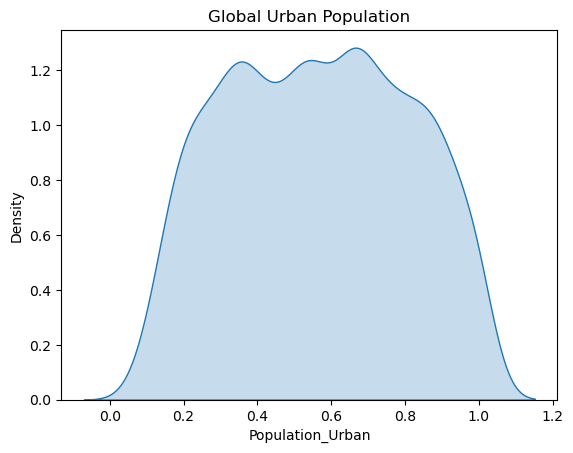

In [38]:
# plotting Global urban population
sns.kdeplot(df['Population_Urban'], shade=True)
plt.title('Global Urban Population')
plt.show()

In [39]:
# converting string to float
df['Tourism_Inbound']=df['Tourism_Inbound'].str.replace('$','')
df['Tourism_Inbound']=df['Tourism_Inbound'].str.replace(',','')
df['Tourism_Inbound']=df['Tourism_Inbound'].astype(float)

In [40]:
# converting string to float
df['Tourism_Outbound']=df['Tourism_Outbound'].str.replace('$','')
df['Tourism_Outbound']=df['Tourism_Outbound'].str.replace(',','')
df['Tourism_Outbound']=df['Tourism_Outbound'].astype(float)

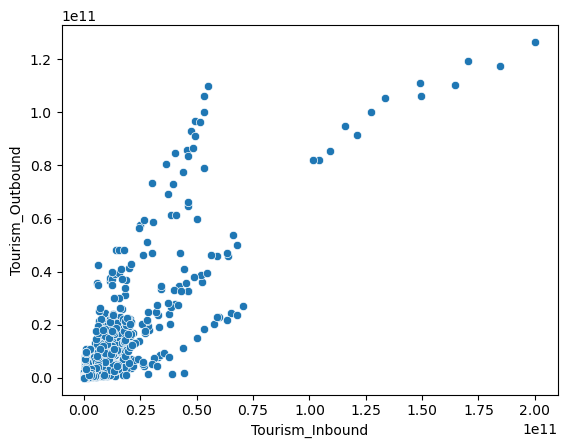

In [41]:
# Representation of Tourism Inbound and Tourism outbound Data using Scatterplot
sns.scatterplot(x='Tourism_Inbound',y='Tourism_Outbound',data=df)
plt.show()

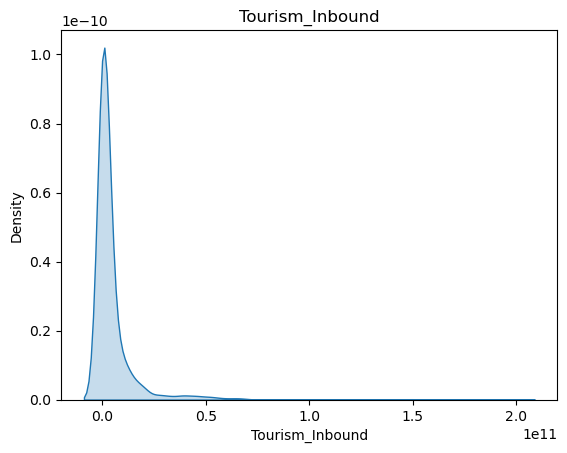

In [42]:
# Plotting tourism Inbound data
sns.kdeplot(df['Tourism_Inbound'], shade=True)
plt.title('Tourism_Inbound')
plt.show()

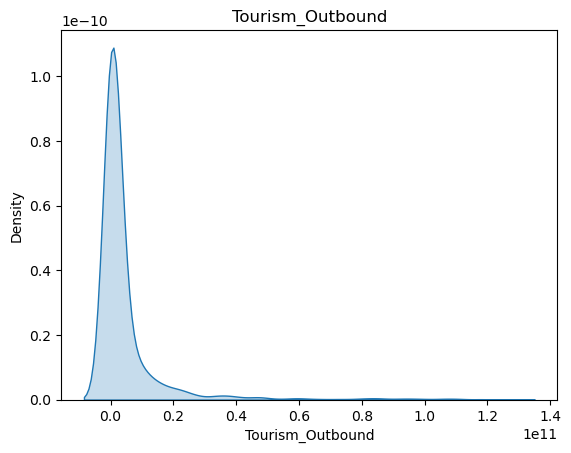

In [43]:
# Plotting tourism Inbound data
sns.kdeplot(df['Tourism_Outbound'], shade=True)
plt.title('Tourism_Outbound')
plt.show()

In [44]:
# Null Values Percentage
null_pertanage=[]
def null_per(x):
    for i in x.columns:
        a=x[i].isnull().sum()/len(x[i]) * 100
        print(i,a)
        if a>=0:
            null_pertanage.append(i)
null_per(df)    

Birth_Rate 4.400887573964497
Business_Tax_Rate 47.374260355029584
CO2_Emissions 21.412721893491124
Country 0.0
Days_to_Start_Business 36.46449704142012
Ease_of_Business 93.15828402366864
Energy_Usage 33.98668639053255
GDP 7.766272189349112
Health_Exp%GDP 11.427514792899409
Health_Exp/Capita 11.427514792899409
Hours_to_do_Tax 47.633136094674555
Infant_Mortality_Rate 9.615384615384617
Internet_Usage 6.397928994082839
Lending_Interest 30.473372781065088
Life_Expectancy_Female 5.029585798816568
Life_Expectancy_Male 5.029585798816568
Mobile_Phone_Usage 6.17603550295858
Number_of_Records 0.0
Population_0to14 8.136094674556213
Population_15to64 8.136094674556213
Population_65plus 8.136094674556213
Population_Total 0.0
Population_Urban 0.9615384615384616
Tourism_Inbound 13.609467455621301
Tourism_Outbound 17.418639053254438


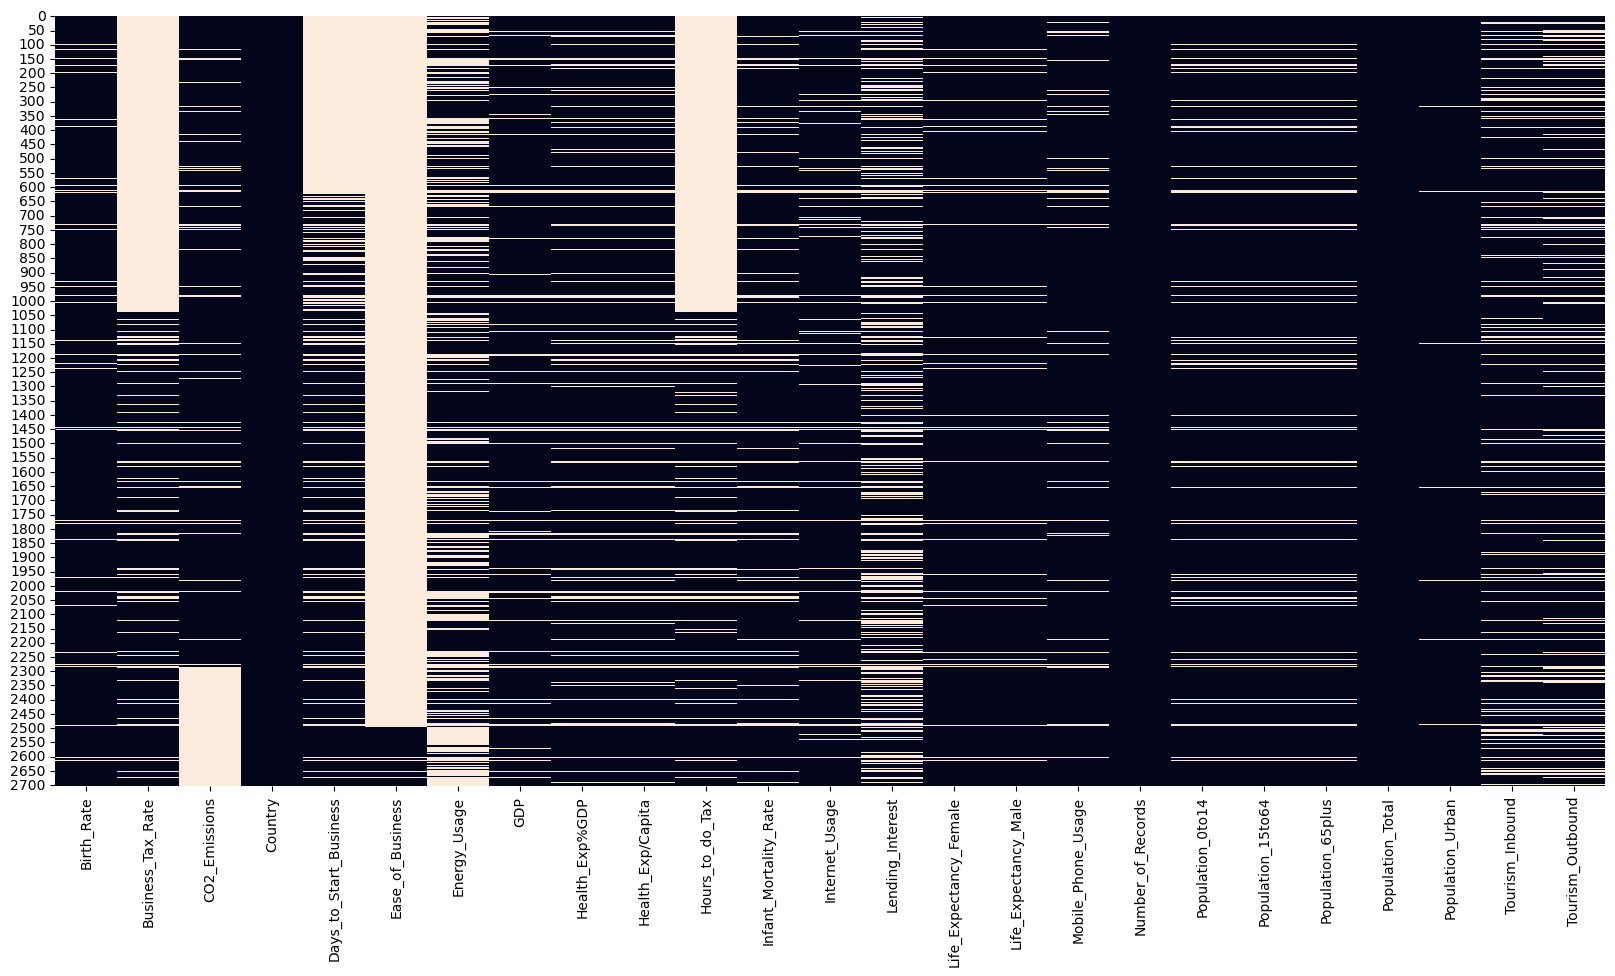

In [45]:
# Plotting missing values of the data by using Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Key Insights from above Heatmap:
1. The data set has many missing values
2. Ease of doing business has highest missing values, followed by Hours to do tax & Business Tax Rate
3. Country, Number of Records & Total Populations are the only features which doesnt have any missing values

# Handling Missing Values

In [46]:
# Missing values imptatation with median, 4.40% missing data
median=df['Birth_Rate'].median()
df['Birth_Rate']=df['Birth_Rate'].fillna(median)

In [47]:
df['Birth_Rate'].isnull().sum()

0

In [48]:
# Imputing Business Tax Rate by using KNN imputer, 47.37% missing data
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
x=np.array(df['Business_Tax_Rate'])
x=x.reshape(-1, 1)

df['Business_Tax_Rate'] = imputer.fit_transform(x)

In [49]:
df['Business_Tax_Rate'].isnull().sum()

0

In [50]:
# Imputing CO2 Emissions by using KNN imputer, missing data:21.4%
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
x=np.array(df['CO2_Emissions'])
x=x.reshape(-1, 1)

df['CO2_Emissions'] = imputer.fit_transform(x)

In [51]:
df['CO2_Emissions'].isnull().sum()

0

In [52]:
# Imputing Days to start business missing data, missing data is 36.16%
x=np.array(df['Days_to_Start_Business'])
x=x.reshape(-1, 1)

df['Days_to_Start_Business'] = imputer.fit_transform(x)

In [53]:
df['Days_to_Start_Business'].isnull().sum()

0

In [54]:
# Imputing missing data for Ease of Business, missing data: 93%

In [55]:
# Imputing Energy Usage missing data by using KNN imputer, missing data: 33.9%
x=np.array(df['Energy_Usage'])
x=x.reshape(-1,1)

df['Energy_Usage']=imputer.fit_transform(x)

In [56]:
df['Energy_Usage'].isnull().sum()

0

In [57]:
# Imputing GDP, missing data: 7.76%
median=df['GDP'].median()
df['GDP']=df['GDP'].fillna(median)

In [58]:
df['GDP'].isnull().sum()

0

In [59]:
# Imputing Health Exp%GDP, missing data: 11.42%
median=df['Health_Exp%GDP'].median()
df['Health_Exp%GDP']=df['Health_Exp%GDP'].fillna(median)

In [60]:
df['Health_Exp%GDP'].isnull().sum()

0

In [61]:
# Imputing Health Exp/Capita, missing data: 11.42%
median=df['Health_Exp/Capita'].median()
df['Health_Exp/Capita']=df['Health_Exp/Capita'].fillna(median)

In [62]:
df['Health_Exp/Capita'].isnull().sum()

0

In [63]:
# Hours to do tax data imputing using KNN imputer
a=np.array(df['Hours_to_do_Tax'])
a=a.reshape(-1,1)

df['Hours_to_do_Tax']=imputer.fit_transform(a)

In [64]:
df['Hours_to_do_Tax'].isnull().sum()

0

In [65]:
# Imputing Infant Mortality Rate, missing data: 9.61%
median=df['Infant_Mortality_Rate'].median()
df['Infant_Mortality_Rate']=df['Infant_Mortality_Rate'].fillna(median)

In [66]:
df['Infant_Mortality_Rate'].isnull().sum()

0

In [67]:
# Imputing  Internet Usage, missing data: 6.39%
median=df['Internet_Usage'].median()
df['Internet_Usage']=df['Internet_Usage'].fillna(median)

In [68]:
df['Internet_Usage'].isnull().sum()

0

In [69]:
# Imputing Lending Interest, missing data is 30.47%
a=np.array(df['Lending_Interest'])
a=a.reshape(-1,1)

df['Lending_Interest']=imputer.fit_transform(a)

In [70]:
df['Lending_Interest'].isnull().sum()

0

In [71]:
# Imputing Life_Expectancy_Male, missing data is 5.029%
median=df['Life_Expectancy_Male'].median()
df['Life_Expectancy_Male']=df['Life_Expectancy_Male'].fillna(median)

In [72]:
df['Life_Expectancy_Male'].isnull().sum()

0

In [73]:
# Imputing Life_Expectancy_Female missing data, missing data is 5.029%
median=df['Life_Expectancy_Female'].median()
df['Life_Expectancy_Female']=df['Life_Expectancy_Female'].fillna(median)

In [74]:
df['Life_Expectancy_Female'].isnull().sum()

0

In [75]:
# Imputing Mobile phone usage missing data, missing data is 6.17%
median=df['Mobile_Phone_Usage'].median()
df['Mobile_Phone_Usage']=df['Mobile_Phone_Usage'].fillna(median)

In [76]:
df['Mobile_Phone_Usage'].isnull().sum()

0

In [77]:
# Imputing Urban Population missing data, missing data is 6.17%
median=df['Population_Urban'].median()
df['Population_Urban']=df['Population_Urban'].fillna(median)

In [78]:
df['Population_Urban'].isnull().sum()

0

In [79]:
# Imputing Tourism Inbound missing data, missing data is 13.6%%
a=np.array(df['Tourism_Inbound'])
a=a.reshape(-1,1)

df['Tourism_Inbound']=imputer.fit_transform(a)

In [80]:
df['Tourism_Inbound'].isnull().sum()

0

In [81]:
# Imputing Lending Interest, missing data is 30.47%
a=np.array(df['Tourism_Outbound'])
a=a.reshape(-1,1)

df['Tourism_Outbound']=imputer.fit_transform(a)

In [82]:
df['Tourism_Outbound'].isnull().sum()

0

In [83]:
df.isnull().sum()

Birth_Rate                   0
Business_Tax_Rate            0
CO2_Emissions                0
Country                      0
Days_to_Start_Business       0
Ease_of_Business          2519
Energy_Usage                 0
GDP                          0
Health_Exp%GDP               0
Health_Exp/Capita            0
Hours_to_do_Tax              0
Infant_Mortality_Rate        0
Internet_Usage               0
Lending_Interest             0
Life_Expectancy_Female       0
Life_Expectancy_Male         0
Mobile_Phone_Usage           0
Number_of_Records            0
Population_0to14           220
Population_15to64          220
Population_65plus          220
Population_Total             0
Population_Urban             0
Tourism_Inbound              0
Tourism_Outbound             0
dtype: int64

#Interpolate backwardly across the column:
df.interpolate(method ='linear', limit_direction ='backward', inplace=True)

#Interpolate in forward order across the column:
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

 #Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
    return outliers

#Apply the function to the entire data frame
outliers_iqr = detect_outliers_iqr(df)

#Print the rows with outliers
df[outliers_iqr]